# Eigenvalue problem: Coupled oscillators 
- by Börge Göbel

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

![Coupled_oscillators](figure_08_coupled_oscillators.png)

\begin{align}
m\ddot{r}_1 &= -k(r_1-r_l-a) -k(r_1-r_2-a)\\
m\ddot{r}_2 &= -k(r_2-r_1-a) -k(r_2-r_3-a)\\
m\ddot{r}_3 &= -k(r_3-r_2-a) -k(r_3-r_r-a)
\end{align}

The constants can be dropped, since we can transform \\( (r_1 - a) \rightarrow r_1, (r_2 - 2a) \rightarrow r_2, (r_3 - 3a) \rightarrow r_3, \\) and use \\(r_l=0, r_r=4a\\)

\begin{align}
m\ddot{r}_1 &= -k(r_1) -k(r_1-r_2)\\
m\ddot{r}_2 &= -k(r_2-r_1) -k(r_2-r_3)\\
m\ddot{r}_3 &= -k(r_3-r_2) -k(r_3)
\end{align}

This is identical to

\begin{align}
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\end{pmatrix}
\end{align}

We can, of course, solve this system of equations numerically. 

## 1. Solving the coupled differential equations numerically 

In [2]:
k = 1
m = 1

def f_3osc(t,y):
    r = y[0:3]
    v = y[3:6]
    eq1 = (2*r[0] -r[1]) * -k/m
    eq2 = (-r[0] +2*r[1] -r[2]) * -k/m
    eq3 = (-r[1] +2*r[2]) * -k/m
    return [v[0], v[1], v[2], eq1, eq2, eq3]

In [3]:
tStart = 0
tEnd = 100

a = 1

yStart = 0.3 * (2*np.random.rand(6)-1) * a

solution_3osc = integrate.solve_ivp(f_3osc, [tStart, tEnd], yStart, method='RK45', t_eval = np.linspace(tStart, tEnd, 1001))

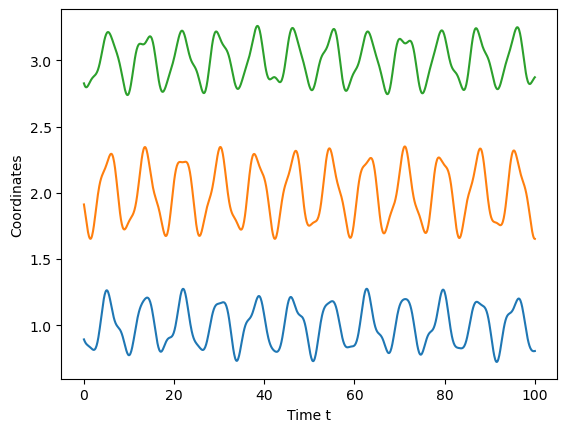

In [4]:
plt.xlabel('Time t')
plt.ylabel('Coordinates')

plt.plot(solution_3osc.t, solution_3osc.y[0] + 1*a)
plt.plot(solution_3osc.t, solution_3osc.y[1] + 2*a)
plt.plot(solution_3osc.t, solution_3osc.y[2] + 3*a)

## 2. The eigenvalue problem

### 2.1 Why is it an eigenvalue problem?

The equation for 3 oscillators was 

\begin{align}
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\end{pmatrix}
\end{align}

Solving the system numerically is nice. However, it would be much easier if the matrix would be just a diagonal matrix or even a scalar:

\begin{align}
\begin{pmatrix}\ddot{q}_1\\\ddot{q}_2\\\ddot{q}_3\end{pmatrix}=-\frac{k}{m}
\lambda
\begin{pmatrix}q_1\\ q_2\\ q_3\end{pmatrix}
\end{align}

In this case the solution would be harmonic oscillators with a frequency \\( \omega = \sqrt{\frac{k}{m}\lambda}\\). 

We must find a unitary matrix \\(\underline{u}\\) with \\(\underline{u}^{-1}\underline{u} = \underline{u}\,\underline{u}^{-1} = 1\\) and \\( \underline{u}^{-1}\underline{A}\,\underline{u} = \lambda\\) so that

\begin{align} 
\ddot{\vec{r}}&=-\frac{k}{m}\underline{A}\vec{r}\\
\ddot{\vec{r}}&=-\frac{k}{m}\left(\underline{u}\,\underline{u}^{-1}\right)\,\underline{A}\,\left(\underline{u}\,\underline{u}^{-1}\right)\vec{r}\\
\left(\underline{u}^{-1}\ddot{\vec{r}}\right)&=-\frac{k}{m}\left(\underline{u}^{-1}\,\underline{A}\,\underline{u}\right)\,\left(\underline{u}^{-1}\vec{r}\right)\\
\ddot{\vec{q}}&=-\frac{k}{m}\lambda \vec{q}
\end{align}

This means we must find:

\begin{align}
\underline{u}^{-1}\,\underline{A}\,\underline{u} &= \lambda\\
\underline{A}\,\underline{u} &= \lambda\underline{u}
\end{align}

or

\begin{align}
\underline{u}^{-1}\,\underline{A}\,\underline{u}\vec{r} &= \lambda\vec{r}\\
\underline{A}\,\underline{u}\vec{r} &= \lambda\underline{u}\vec{r}\\
\end{align}

In other words, we must find the eigenvalues and eigenvectors of \\( \underline{A} \\).

### a) Calculate the eigenvalues using a numpy routine

We want to determine the eigenvalues of the matrix

\begin{align}
\underline{A} = \begin{pmatrix}2&-1&0\\-1&2&-1\\0&-1&2\end{pmatrix}
\end{align}

In [5]:
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

In [6]:
np.linalg.eigvals(A)

array([3.41421356, 2.        , 0.58578644])

### b) Exercise: Program a routine ourselves

We have to solve the following equation

\begin{align}
0 = \det(\underline{A}-\lambda\underline{1})
\end{align}

In [10]:
def det3(A):
    term1 = A[0,0] * (A[1,1]*A[2,2]-A[1,2]*A[2,1])
    term2 = A[1,0] * (A[0,1]*A[2,2]-A[0,2]*A[2,1])
    term3 = A[2,0] * (A[0,1]*A[1,2]-A[1,2]*A[1,1])
    return term1 -term2 +term3

\begin{align}
0 &= \det\begin{pmatrix}2-\lambda&-1&0\\-1&2-\lambda&-1\\0&-1&2-\lambda\end{pmatrix}\\
0 &= (2-\lambda)\det\begin{pmatrix}2-\lambda&-1\\-1&2-\lambda\end{pmatrix}-(-1)\det\begin{pmatrix}-1&-1\\0&2-\lambda\end{pmatrix}\\
0 &= (2-\lambda)^3-(2-\lambda)-(2-\lambda)\\
0 &= -\lambda^3 +6\lambda^2 - 12\lambda + 8 -4 +2\lambda
\end{align}

We have to find the roots of a cubic function (characteristic polynomial)

\begin{align}
0 &= -\lambda^3 +6\lambda^2 - 10\lambda + 4
\end{align}

In [11]:
def characteristicPolynomial(x):
    return det3(A-x*np.identity(3))

In [12]:
def findRoot(f, n, xmin, xmax, startStep):
    # f: Function
    # n: Number of roots
    # [xmin, xmax]: Range in which the roots are expected
    # startStep: Starting value for the step
    x = xmin
    d = startStep
    signA = np.sign(f(x))
    signB = np.sign(f(x))
    root = []
    while len(root) < n:
        while d > 0.0000001:
            # compare sign of neighboring points
            while signA-signB == 0:
                signA = signB
                x = x+d
                signB = np.sign(f(x))
            # decrease d whenever the sign changes until desired accuracy is reached
            x = x-d
            signA = np.sign(f(x-d))
            signB = np.sign(f(x))
            d = d*0.1
        # store x in root
        root.append(x)
        # reset d
        d = startStep
        # go to next x and reset signs
        x = x+d
        signA = np.sign(f(x))
        signB = np.sign(f(x))
    return root

### c) Analyzing the eigensystem

The analytical solutions are:
\\( \quad \lambda_1 = 2+\sqrt{2}, \lambda_2 = 2, \quad \lambda_3 = 2-\sqrt{2}\\)

This leads us to the eigenfrequencies: \\( \omega = \sqrt{\frac{k}{m}\lambda}\\)

\begin{align} 
\omega_1 = \sqrt{\frac{k}{m}}\sqrt{2+\sqrt{2}}, \quad \omega_2 = \sqrt{\frac{k}{m}}\sqrt{2}, \quad \omega_3 = \sqrt{\frac{k}{m}}\sqrt{2-\sqrt{2}}
\end{align}

The eigenvectors are 
\begin{align}
\begin{pmatrix}-\frac{1}{2}\\\frac{1}{\sqrt{2}}\\-\frac{1}{2}\end{pmatrix}\quad\quad
\begin{pmatrix}-\frac{1}{\sqrt{2}}\\0\\\frac{1}{\sqrt{2}}\end{pmatrix}\quad\quad
\begin{pmatrix}\frac{1}{2}\\\frac{1}{\sqrt{2}}\\\frac{1}{2}\end{pmatrix}
\end{align}

## 3. Fourier transform

\\(
\tilde{y}(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} y(t) e^{i\omega t}\mathrm{d}t
\\)

In [8]:
def integralTrapezoidal(data):
    a = 0
    for i in range( len(data[0]) -1 ):
        a = a + ( data[1,i+1] + data[1,i] ) / 2 * (data[0,i+1] - data[0,i])
    return a

Eigenvalues:

\begin{align} 
\omega_1 = \sqrt{\frac{k}{m}}\sqrt{2+\sqrt{2}}, \quad \omega_2 = \sqrt{\frac{k}{m}}\sqrt{2}, \quad \omega_3 = \sqrt{\frac{k}{m}}\sqrt{2-\sqrt{2}}
\end{align}

Eigenvectors:

\begin{align}
\begin{pmatrix}-\frac{1}{2}\\\frac{1}{\sqrt{2}}\\-\frac{1}{2}\end{pmatrix}\quad\quad
\begin{pmatrix}-\frac{1}{\sqrt{2}}\\0\\\frac{1}{\sqrt{2}}\end{pmatrix}\quad\quad
\begin{pmatrix}\frac{1}{2}\\\frac{1}{\sqrt{2}}\\\frac{1}{2}\end{pmatrix}
\end{align}

## 4. Fit harmonic functions with the eigenfrequency to the numerical solution

We consider the model function 

\\( f(t) = A_1\cos(\omega_1t+\phi_1) + A_2\cos(\omega_2t+\phi_2) + A_3\cos(\omega_3t+\phi_3)\\)

The fitting parameters are

\\( \vec{a} = (A_1, \phi_1, A_2, \phi_2, A_3, \phi_3)\\)

In [9]:
def functionModel(t, a):
    return a[0]*np.cos(omega1*t+a[1]) + a[2]*np.cos(omega2*t+a[3]) + a[4]*np.cos(omega3*t+a[5])

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) \\)

\\( \nabla_{\vec{a}} \Delta = \begin{pmatrix}
\cos(\omega_1t+\phi_1)\\
-A_1\sin(\omega_1t+\phi_1)\\
\cos(\omega_2t+\phi_2)\\
-A_2\sin(\omega_2t+\phi_2)\\
\cos(\omega_3t+\phi_3)\\
-A_3\sin(\omega_3t+\phi_3)
\end{pmatrix}\\)

## 5. Generalization to n oscillators

### 5.1 Numerical solution

### 5.2 Eigenfrequencies

### 5.3 Fourier transform

## 6. Alternative geometry: Periodic boundary conditions

![Coupled_oscillators_circle](figure_08_coupled_oscillators_circle.png)

\\( 
\begin{pmatrix}\ddot{r}_1\\\ddot{r}_2\\\ddot{r}_3\\\ddot{r}_4\\\ddot{r}_5\\\ddot{r}_6\end{pmatrix}=-\frac{k}{m}
\begin{pmatrix}2&-1&0&0&0&-1\\-1&2&-1&0&0&0\\0&-1&2&-1&0&0\\0&0&-1&2&-1&0\\0&0&0&-1&2&-1\\-1&0&0&0&-1&2&\end{pmatrix}
\begin{pmatrix}r_1\\ r_2\\ r_3\\r_4\\ r_5\\ r_6\end{pmatrix}
\\)

### 6.1 Numerical solution

### 6.2 Eigenfrequencies

The first eigenvalue is zero. The corresponding mode is the translation that is allowed due to the periodic boundary conditions. It was forbidden before, since the system had fixed edges.

Numerically, this value will be a very small number. Here it is negative which gives an error when calculating the square root. The correct value for the square root (and the frequency) is zero: The eigenmode is not an oscillation but a translation.